# Information Retrieval

Bag of Words and TF-IDF

In [11]:
# it can be used for making bag of words across the whole corpora
#https://honingds.com/blog/natural-language-processing-with-python/
#https://www.kaggle.com/ngyptr/python-nltk-sentiment-analysis

## Library Imports

In [12]:
# Import Os to get to the root directory
import os
import sys


# Root directory of the project
ROOT_DIR = os.path.abspath("../")
sys.path.append(ROOT_DIR)

# Import own functions
from libraries import corpus
from libraries import pdf2text

import warnings
warnings.filterwarnings("ignore")

# Import packages

import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 
import string # for punctuation
import gc
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
from importlib import reload
reload(corpus)

<module 'libraries.corpus' from 'C:\\Users\\laman\\Desktop\\datascience_project\\libraries\\corpus.py'>

## Data Preprocessing

In [14]:
dataset = pdf2text.get_dataset()

In [15]:
dataset.keys()

dict_keys(['#metahash', '0x', 'abbccoin', 'aion', 'apollocurrency', 'ardor', 'ark', 'basicattentiontoken', 'bhpcoin', 'binancecoin', 'bitcoin', 'bitcoingold', 'bitshares', 'bittorrent', 'bytecoin', 'bytom', 'celernetwork', 'chainlink', 'cosmocoin', 'cosmos', 'crypto', 'cryptonex', 'dai', 'dash', 'decentraland', 'dent', 'digixdao', 'dogecoin', 'elastos', 'enjincoin', 'eos', 'ethereum', 'ethereumclassic', 'factom', 'fantom', 'gnosis', 'golem', 'gxchain', 'holo', 'horizen', 'hypercash', 'hyperion', 'icon', 'iexecrlc', 'inocoin', 'iota', 'japancontenttoken', 'komodo', 'latoken', 'lina', 'loopring', 'maidsafecoin', 'maker', 'metal', 'metaverseetp', 'mixin', 'monero', 'nano', 'nebulas', 'nem', 'nexo', 'nkn', 'obyte', 'omisego', 'ontology', 'orbs', 'particl', 'paxosstandardtoken', 'powerledger', 'pundix', 'ravencoin', 'riftoken', 'siacoin', 'singularitynet', 'skycoin', 'solve', 'status', 'steem', 'stellar', 'stratis', 'synthetixnetworktoken', 'tenx', 'tether', 'tezos', 'theta', 'thetafuel', '

In [16]:
len(dataset.keys())

99

In [17]:
makeSentences = True
corpora = corpus.makeCleanCorpus(dataset, lemmatize=True, removePunct=True, removeNums=True,makeSentences=makeSentences, 
                                 removeURL=True, removeChar=True)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading en_core_web_md: Package 'en_core_web_md' not
[nltk_data]     found in index


Cleaning: #metahash
Cleaning: 0x
Cleaning: abbccoin
Cleaning: aion
Cleaning: apollocurrency
Cleaning: ardor
Cleaning: ark
Cleaning: basicattentiontoken
Cleaning: bhpcoin
Cleaning: binancecoin
Cleaning: bitcoin
Cleaning: bitcoingold
Cleaning: bitshares
Cleaning: bittorrent
Cleaning: bytecoin
Cleaning: bytom
Cleaning: celernetwork
Cleaning: chainlink
Cleaning: cosmocoin
Cleaning: cosmos
Cleaning: crypto
Cleaning: cryptonex
Cleaning: dai
Cleaning: dash
Cleaning: decentraland
Cleaning: dent
Cleaning: digixdao
Cleaning: dogecoin
Cleaning: elastos
Cleaning: enjincoin
Cleaning: eos
Cleaning: ethereum
Cleaning: ethereumclassic
Cleaning: factom
Cleaning: fantom
Cleaning: gnosis
Cleaning: golem
Cleaning: gxchain
Cleaning: holo
Cleaning: horizen
Cleaning: hypercash
Cleaning: hyperion
Cleaning: icon
Cleaning: iexecrlc
Cleaning: inocoin
Cleaning: iota
Cleaning: japancontenttoken
Cleaning: komodo
Cleaning: latoken
Cleaning: lina
Cleaning: loopring
Cleaning: maidsafecoin
Cleaning: maker
Cleaning: met

In [18]:
corpora.keys()

dict_keys(['#metahash', '0x', 'abbccoin', 'aion', 'apollocurrency', 'ardor', 'ark', 'basicattentiontoken', 'bhpcoin', 'binancecoin', 'bitcoin', 'bitcoingold', 'bitshares', 'bittorrent', 'bytecoin', 'bytom', 'celernetwork', 'chainlink', 'cosmocoin', 'cosmos', 'crypto', 'cryptonex', 'dai', 'dash', 'decentraland', 'dent', 'digixdao', 'dogecoin', 'elastos', 'enjincoin', 'eos', 'ethereum', 'ethereumclassic', 'factom', 'fantom', 'gnosis', 'golem', 'gxchain', 'holo', 'horizen', 'hypercash', 'hyperion', 'icon', 'iexecrlc', 'inocoin', 'iota', 'japancontenttoken', 'komodo', 'latoken', 'lina', 'loopring', 'maidsafecoin', 'maker', 'metal', 'metaverseetp', 'mixin', 'monero', 'nano', 'nebulas', 'nem', 'nexo', 'nkn', 'obyte', 'omisego', 'ontology', 'orbs', 'particl', 'paxosstandardtoken', 'powerledger', 'pundix', 'ravencoin', 'riftoken', 'siacoin', 'singularitynet', 'skycoin', 'solve', 'status', 'steem', 'stellar', 'stratis', 'synthetixnetworktoken', 'tenx', 'tether', 'tezos', 'theta', 'thetafuel', '

# Tokenization

Tokenization is the first step. The text documents will be broken down into small pieces, in this case words. These tokenized words are called tokens. 

In [19]:
# Start tokenizing the dataset
tokenizer = nltk.tokenize.RegexpTokenizer('\s+', gaps=True)

if makeSentences:
    #############################################
    # Tokenization on sentences
    tokens = [tokenizer.tokenize(s) for s in corpora["bitcoin"]]
    # Flatten the list
    tokens = np.reshape(np.concatenate(tokens), -1)
    #############################################
else:
    #############################################
    # Tokenization on whole corpus (no sentences)
    tokens = tokenizer.tokenize(corpora["bitcoin"])
    #############################################

print('We have', len(tokens), 'words in total. \n')
print(tokens[5:10])

We have 1408 words in total. 

['peertopeer' 'version' 'electronic' 'cash' 'online']


# Frequency Distribution

The FreqDist can quickly show how frequent a word occurs in the coprus. Frequency Distribution enables to define the most informative words about the topic of the text document.
https://www.nltk.org/book/ch01.html

In [20]:
from nltk.probability import FreqDist

# Turn corpus into np before unnest the list
# numpy can handle text as well

fdist = FreqDist(tokens)
fdist.most_common(10)

[('transaction', 69),
 ('block', 65),
 ('hash', 45),
 ('node', 38),
 ('chain', 27),
 ('attacker', 23),
 ('nerk', 21),
 ('proofofwork', 18),
 ('owner', 17),
 ('work', 16)]

In [21]:
import matplotlib.pyplot as plt

fdist.plot(30,cumulative=False)
plt.show()

<Figure size 640x480 with 1 Axes>

# N-grams

N-grams is a sequence of N words. Extracting a list of word pairs from a text is known as bigrams. N-gram model predicts the occurrence of a word based on the occurrence of its N – 1 previous words. So here we are answering the question – how far back in the history of a sequence of words should we go to predict the next word?

https://blog.xrds.acm.org/2017/10/introduction-n-grams-need/

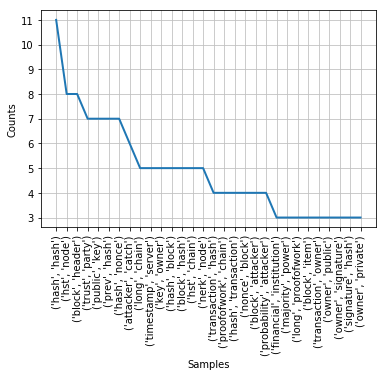

In [22]:
# n=2 - bigram model is the probability of a word based only on its previous word.

from nltk import bigrams, ngrams
bigrams_tokens = bigrams(tokens)
fdist_bigrams = FreqDist(list(bigrams_tokens))
fdist_bigrams.plot(30,cumulative=False)
plt.show()

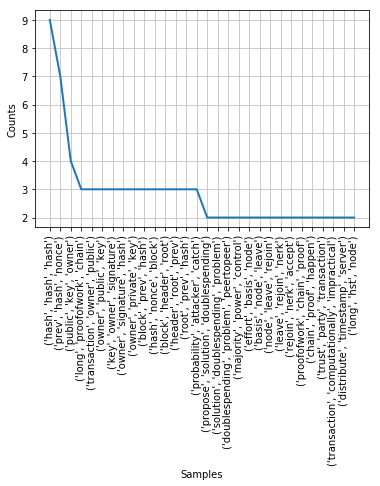

In [23]:
# n=3
trigrams_tokens = ngrams(tokens, 3)
fdist_trigrams = FreqDist(list(trigrams_tokens))
fdist_trigrams.plot(30,cumulative=False)
plt.show()

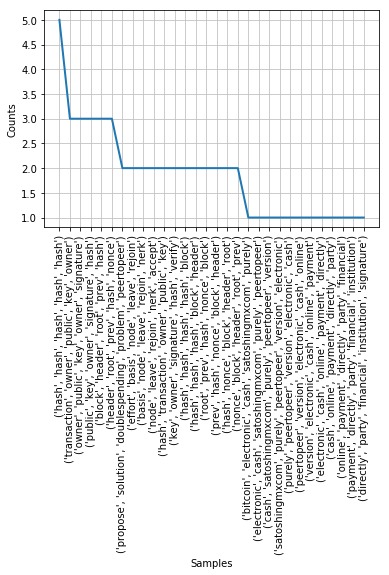

In [24]:
# n=5
grams5_tokens = ngrams(tokens, 5)
fdist_grams5 = FreqDist(list(grams5_tokens))
fdist_grams5.plot(30,cumulative=False)
plt.show()

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
print(vect)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


In [26]:
# use TreeankWordTokenizer
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
vect.set_params(tokenizer=tokenizer.tokenize)

# remove English stop words
vect.set_params(stop_words='english')

# include 1-grams and 2-grams
vect.set_params(ngram_range=(1, 2))

# ignore terms that appear in more than 50% of the documents
vect.set_params(max_df=0.5)

# only keep terms that appear in at least 2 documents
vect.set_params(min_df=2)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=2,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<bound method TreebankWordTokenizer.tokenize of <nltk.tokenize.treebank.TreebankWordTokenizer object at 0x0000021BBCDD9438>>,
        vocabulary=None)

In [27]:
# Initialize the "CountVectorizer" object, which is scikit-learn's bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of strings.
train_data_features = vectorizer.fit_transform(tokens)

# Numpy arrays are easy to work with, so convert the result to an array.
train_data_features = train_data_features.toarray()

# see final the clean data
print (train_data_features.shape)

(1408, 530)


# 1 - Bag of Words for top white papers

A popular and simple method of feature extraction with text data is called the bag-of-words model of text. The feature_extraction module from scikit-learn to create bag-of-words features is used below.

In [28]:
# Initialize a CountVectorizer object: count_vectorizer
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None)

chainlink = [corpora['chainlink']]
# Transforms the data into a bag of words
count_train = count_vec.fit(corpora["chainlink"])
bag_of_words = count_vec.transform(corpora["chainlink"])

# Print the first 10 features of the count_vec
print("Every feature:\n{}".format(count_vec.get_feature_names()))
print("\nEvery 3rd feature:\n{}".format(count_vec.get_feature_names()[::3]))

Every feature:


['abhiram', 'ability', 'absolute', 'abstrac', 'abstraction', 'academic', 'accept', 'acceptable', 'accepted', 'access', 'accessible', 'accommodate', 'accompany', 'accomplish', 'account', 'accuracy', 'achieve', 'acle', 'acous', 'action', 'activate', 'activation', 'active', 'actively', 'activity', 'actu', 'actuly', 'adapter', 'add', 'addition', 'additionly', 'address', 'adequate', 'adjunct', 'administer', 'administrative', 'administrator', 'adopt', 'advance', 'adver', 'adversary', 'advisor', 'advocate', 'afterward', 'agenda', 'agg', 'agga', 'aggre', 'aggregate', 'aggregation', 'aggressively', 'agree', 'agreement', 'aim', 'alternatively', 'ample', 'andor', 'answer', 'answersparticularly', 'anticipate', 'apparent', 'appendonly', 'application', 'applicationoriented', 'approach', 'appropriately', 'approxi', 'arbitrarily', 'architectur', 'architecture', 'archive', 'area', 'argument', 'arises', 'arm', 'arrive', 'article', 'arxiv', 'asset', 'assign', 'assignment', 'associate', 'assume', 'assumes


Every 3rd feature:
['abhiram', 'abstrac', 'accept', 'access', 'accompany', 'accuracy', 'acous', 'activation', 'activity', 'adapter', 'additionly', 'adjunct', 'administrator', 'adver', 'advocate', 'agg', 'aggregate', 'agree', 'alternatively', 'answer', 'apparent', 'applicationoriented', 'approxi', 'architecture', 'argument', 'arrive', 'asset', 'associate', 'assumption', 'asynchronous', 'attach', 'attain', 'attest', 'augur', 'authenticity', 'authorize', 'automaticly', 'average', 'aware', 'bancing', 'basic', 'behave', 'belonging', 'benignly', 'bidding', 'bind', 'blockchain', 'board', 'bound', 'breach', 'broadcast', 'buggy', 'built', 'bulletinboard', 'buterin', 'canetti', 'capable', 'card', 'cat', 'cculate', 'cculating', 'centive', 'certifica', 'chain', 'channel', 'cheaper', 'cheese', 'chlenging', 'chosen', 'circle', 'claim', 'cled', 'clique', 'clude', 'cod', 'col', 'collective', 'com', 'commensurate', 'commitment', 'commits', 'commu', 'community', 'comparison', 'compensation', 'complemen

In [29]:
#Vocabulary and vocabulary ID

print("Vocabulary size: {}".format(len(count_train.vocabulary_)))
print("Vocabulary content:\n {}".format(count_train.vocabulary_))

Vocabulary size: 1615
Vocabulary content:


 {'decentrized': 375, 'nerk': 943, 'smart': 1373, 'contract': 309, 'poise': 1075, 'revolutionize': 1267, 'industry': 741, 'replace': 1230, 'tradition': 1488, 'leg': 833, 'agreement': 52, 'centrly': 185, 'automate': 106, 'digit': 425, 'performance': 1048, 'verification': 1556, 'execution': 538, 'rely': 1223, 'manu': 872, 'action': 19, 'party': 1032, 'programmat': 1136, 'icly': 707, 'retrieves': 1262, 'update': 1536, 'relevant': 1221, 'change': 191, 'underlie': 1520, 'consensus': 294, 'protocol': 1155, 'blockchains': 139, 'support': 1429, 'native': 935, 'communication': 245, 'extern': 559, 'solution': 1382, 'problem': 1122, 'introduce': 788, 'functionity': 635, 'cled': 213, 'oracle': 996, 'provide': 1158, 'connectivity': 293, 'exist': 540, 'centrized': 184, 'service': 1328, 'single': 1361, 'point': 1074, 'failure': 569, 'secure': 1302, 'paper': 1019, 'scribe': 1298, 'onchain': 980, 'compnts': 262, 'gain': 637, 'software': 1380, 'power': 1089, 'node': 951, 'simple': 1356, 'data': 367, 'ag

In [30]:
# Take a look at the words in the vocabulary
vocab = vectorizer.get_feature_names()
print (vocab)

['ability', 'absence', 'accept', 'acceptance', 'accepted', 'access', 'accomplish', 'achieves', 'acm', 'add', 'addition', 'additional', 'agree', 'ahead', 'air', 'alert', 'allocate', 'alternate', 'analogous', 'anonymous', 'application', 'april', 'arbitrary', 'arrive', 'assemble', 'assume', 'assumption', 'attack', 'attacker', 'attackersuccessprobabilitydouble', 'attempt', 'authority', 'average', 'avoid', 'aware', 'bank', 'banking', 'base', 'basis', 'belong', 'benefit', 'binomial', 'bit', 'bitcoin', 'bitstrings', 'block', 'blockblock', 'bmy', 'branch', 'break', 'breakeven', 'broadcast', 'broader', 'broken', 'bury', 'business', 'buyer', 'byte', 'calculate', 'calculation', 'care', 'case', 'cash', 'casual', 'catch', 'central', 'chain', 'chance', 'change', 'channel', 'characterize', 'check', 'choose', 'chronological', 'circulation', 'code', 'coin', 'collect', 'collectively', 'combine', 'commerce', 'common', 'communication', 'compact', 'company', 'compensate', 'compete', 'complete', 'completely

Print the counts of each word in the vocabulary:

In [31]:
# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)

# For each, print the vocabulary word and the number of times it appears in the training set
for tag, count in zip(vocab, dist):
    print (count, tag)

1 ability
1 absence
6 accept
2 acceptance
4 accepted
1 access
2 accomplish
1 achieves
1 acm
7 add
1 addition
2 additional
2 agree
2 ahead
1 air
3 alert
1 allocate
2 alternate
2 analogous
1 anonymous
1 application
2 april
1 arbitrary
1 arrive
1 assemble
2 assume
1 assumption
1 attack
23 attacker
1 attackersuccessprobabilitydouble
1 attempt
2 authority
4 average
3 avoid
2 aware
1 bank
1 banking
4 base
3 basis
2 belong
1 benefit
1 binomial
3 bit
1 bitcoin
1 bitstrings
65 block
1 blockblock
1 bmy
6 branch
2 break
2 breakeven
6 broadcast
1 broader
1 broken
1 bury
1 business
1 buyer
1 byte
1 calculate
1 calculation
1 care
3 case
2 cash
1 casual
8 catch
2 central
27 chain
1 chance
8 change
1 channel
1 characterize
2 check
1 choose
1 chronological
3 circulation
1 code
16 coin
1 collect
1 collectively
4 combine
1 commerce
2 common
3 communication
1 compact
1 company
1 compensate
1 compete
1 complete
2 completely
1 computational
2 computationally
3 computer
1 conclusion
1 conference
3 confirm
1 

# bitcoin

In [32]:
import collections, re

top_1 = corpora["bitcoin"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in top_1]
bagsofwords[0]

Counter({'bitcoin': 1, 'electronic': 1, 'cash': 1, 'satoshingmxcom': 1})

In [33]:
bagsofwords[1]

Counter({'purely': 1,
         'peertopeer': 1,
         'version': 1,
         'electronic': 1,
         'cash': 1,
         'online': 1,
         'payment': 1,
         'directly': 1,
         'party': 1,
         'financial': 1,
         'institution': 1})

In [34]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'transaction': 69, 'block': 65, 'hash': 45, 'node': 38, 'chain': 27, 'attacker': 23, 'nerk': 21, 'proofofwork': 18, 'owner': 17, 'work': 16, 'coin': 16, 'long': 15, 'hst': 15, 'key': 13, 'payment': 12, 'trust': 12, 'public': 12, 'party': 11, 'timestamp': 11, 'probability': 11, 'proof': 9, 'problem': 8, 'change': 8, 'verify': 8, 'time': 8, 'nonce': 8, 'catch': 8, 'header': 8, 'signature': 7, 'power': 7, 'majority': 7, 'add': 7, 'prev': 7, 'incentive': 7, 'link': 7, 'sender': 7, 'electronic': 6, 'solution': 6, 'control': 6, 'generate': 6, 'broadcast': 6, 'accept': 6, 'mint': 6, 'double': 6, 'receive': 6, 'number': 6, 'branch': 6, 'privacy': 6, 'peertopeer': 5, 'require': 5, 'propose': 5, 'model': 5, 'increase': 5, 'server': 5, 'previous': 5, 'item': 5, 'input': 5, 'poisson': 5, 'doublespending': 4, 'redo': 4, 'effort': 4, 'base': 4, 'cost': 4, 'accepted': 4, 'digital': 4, 'payee': 4, 'include': 4, 'average': 4, 'extend': 4, 'reach': 4, 'start': 4, 'combine': 4, 'root': 4, 'sum':

In [35]:
count = CountVectorizer()
docs = np.array(corpora["bitcoin"])
bag = count.fit_transform(docs)
print(bag)

  (0, 416)	1
  (0, 62)	1
  (0, 162)	1
  (0, 43)	1
  (1, 247)	1
  (1, 194)	1
  (1, 321)	1
  (1, 139)	1
  (1, 325)	1
  (1, 308)	1
  (1, 519)	1
  (1, 326)	1
  (1, 370)	1
  (1, 62)	1
  (1, 162)	1
  (2, 151)	1
  (2, 348)	1
  (2, 400)	1
  (2, 502)	1
  (2, 270)	1
  (2, 40)	1
  (2, 274)	1
  (2, 448)	1
  (2, 365)	1
  (2, 438)	1
  :	:
  (137, 82)	1
  (137, 429)	1
  (138, 21)	1
  (138, 93)	1
  (138, 8)	1
  (138, 158)	1
  (138, 44)	1
  (138, 423)	1
  (138, 91)	1
  (138, 422)	1
  (138, 82)	1
  (139, 109)	1
  (139, 127)	1
  (139, 221)	1
  (139, 433)	1
  (140, 376)	1
  (141, 115)	1
  (141, 364)	1
  (141, 259)	1
  (141, 367)	1
  (142, 21)	1
  (142, 351)	1
  (143, 20)	1
  (143, 484)	1
  (143, 353)	1


# ethereum

In [36]:
top_2 = corpora["ethereum"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in top_2]
bagsofwords[0]

Counter({'ethereum': 1})

In [37]:
bagsofwords[1]

Counter({'extgeneration': 1,
         'mart': 1,
         'contract': 1,
         'decentralize': 1,
         'application': 1,
         'platform': 1,
         'documentation': 2,
         'docschatabsvg': 1,
         'introductory': 1,
         'paper': 1,
         'introduce': 1,
         'launch': 1,
         'maintain': 1})

In [38]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'transaction': 130, 'block': 128, 'contract': 125, 'state': 60, 'protocol': 58, 'code': 54, 'node': 54, 'provide': 53, 'miner': 52, 'blockchain': 43, 'data': 43, 'decentralize': 41, 'application': 39, 'account': 39, 'time': 36, 'gas': 35, 'include': 34, 'execution': 32, 'ether': 32, 'currency': 30, 'message': 30, 'fee': 30, 'tree': 29, 'implement': 27, 'create': 27, 'storage': 27, 'mining': 27, 'nerk': 25, 'follow': 24, 'transition': 23, 'exist': 23, 'work': 23, 'sender': 23, 'hash': 23, 'number': 23, 'function': 21, 'change': 21, 'require': 21, 'valid': 21, 'computational': 20, 'problem': 20, 'set': 20, 'add': 20, 'store': 20, 'cost': 20, 'script': 20, 'process': 19, 'attacker': 19, 'financial': 18, 'key': 18, 'proof': 18, 'return': 18, 'send': 18, 'large': 18, 'pay': 18, 'computation': 17, 'step': 17, 'case': 17, 'unit': 17, 'loop': 17, 'user': 16, 'byte': 16, 'asset': 15, 'consensus': 15, 'concept': 15, 'algorithm': 15, 'mechanism': 15, 'signature': 15, 'check': 15, 'develo

In [39]:
count = CountVectorizer()
docs = np.array(corpora["ethereum"])
bag = count.fit_transform(docs)
print(bag)

  (0, 500)	1
  (1, 864)	1
  (1, 816)	1
  (1, 774)	1
  (1, 996)	1
  (1, 776)	1
  (1, 421)	1
  (1, 424)	2
  (1, 1039)	1
  (1, 54)	1
  (1, 357)	1
  (1, 302)	1
  (1, 875)	1
  (1, 543)	1
  (2, 307)	1
  (2, 790)	1
  (2, 201)	1
  (2, 128)	1
  (2, 773)	1
  (2, 772)	1
  (2, 100)	1
  (2, 1288)	1
  (2, 72)	1
  (2, 404)	1
  (2, 343)	1
  :	:
  (534, 1011)	1
  (535, 486)	1
  (535, 1433)	1
  (536, 486)	1
  (536, 1433)	1
  (537, 1012)	1
  (537, 642)	1
  (538, 29)	1
  (538, 629)	1
  (538, 1416)	1
  (539, 570)	1
  (539, 1097)	1
  (539, 875)	1
  (540, 119)	1
  (541, 644)	1
  (541, 1433)	1
  (542, 1351)	2
  (542, 1536)	1
  (542, 138)	1
  (542, 1535)	1
  (542, 861)	1
  (542, 1433)	1
  (542, 1374)	1
  (542, 681)	1
  (542, 996)	1


# binancecoin

In [40]:
top_5 = corpora["binancecoin"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in top_5]
bagsofwords[0]

Counter({'exchange': 3,
         'intro': 2,
         'problem': 1,
         'match': 1,
         'engine': 1,
         'feature': 1,
         'rollout': 1,
         'coin': 2,
         'device': 1,
         'coverage': 1,
         'multilingual': 1,
         'support': 1,
         'preview': 1,
         'revenue': 1,
         'model': 1,
         'allocation': 1,
         'schedule': 1,
         'burn': 1,
         'vest': 1,
         'plan': 1,
         'team': 2,
         'fund': 1,
         'usage': 1,
         'chief': 1,
         'architect': 1,
         'engineering': 1,
         'director': 2,
         'operation': 1,
         'investor': 1,
         'advisor': 1,
         'risk': 1,
         'security': 1,
         'market': 1,
         'competition': 1,
         'view': 1,
         'fundamentally': 1,
         'type': 1,
         'deal': 2,
         'fiat': 1,
         'currency': 1,
         'purely': 1,
         'crypto': 1})

In [41]:
bagsofwords[1]

Counter({'focus': 1})

In [42]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'exchange': 44, 'team': 21, 'trading': 18, 'work': 17, 'fee': 17, 'coin': 14, 'investor': 14, 'year': 14, 'security': 12, 'experience': 12, 'platform': 12, 'client': 12, 'cofounder': 12, 'data': 11, 'crypto': 10, 'company': 10, 'support': 9, 'user': 9, 'engine': 8, 'market': 8, 'financial': 8, 'trader': 8, 'blockchain': 8, 'ceo': 8, 'match': 7, 'director': 7, 'time': 7, 'industry': 7, 'service': 7, 'include': 7, 'july': 7, 'lead': 7, 'responsible': 7, 'revenue': 6, 'big': 6, 'base': 6, 'future': 6, 'built': 6, 'high': 6, 'large': 6, 'founder': 6, 'product': 6, 'problem': 5, 'plan': 5, 'risk': 5, 'focus': 5, 'finance': 5, 'number': 5, 'poor': 5, 'tech': 5, 'order': 5, 'follow': 5, 'provide': 5, 'native': 5, 'english': 5, 'start': 5, 'prior': 5, 'architect': 4, 'operation': 4, 'competition': 4, 'initial': 4, 'development': 4, 'standard': 4, 'ensure': 4, 'partner': 4, 'global': 4, 'list': 4, 'release': 4, 'token': 4, 'project': 4, 'investment': 4, 'firm': 4, 'business': 4, 'core'

In [43]:
count = CountVectorizer()
docs = np.array(corpora["binancecoin"])
bag = count.fit_transform(docs)
print(bag)

  (0, 130)	1
  (0, 401)	1
  (0, 137)	1
  (0, 201)	1
  (0, 144)	2
  (0, 521)	1
  (0, 219)	1
  (0, 535)	1
  (0, 102)	1
  (0, 311)	1
  (0, 441)	1
  (0, 428)	1
  (0, 10)	1
  (0, 266)	1
  (0, 345)	1
  (0, 162)	2
  (0, 181)	1
  (0, 28)	1
  (0, 79)	1
  (0, 529)	1
  (0, 218)	1
  (0, 501)	2
  (0, 372)	1
  (0, 534)	1
  (0, 68)	1
  :	:
  (172, 373)	1
  (172, 501)	1
  (172, 191)	1
  (173, 202)	1
  (173, 102)	1
  (174, 314)	1
  (174, 107)	1
  (174, 145)	1
  (174, 99)	1
  (174, 11)	1
  (174, 101)	1
  (174, 428)	1
  (175, 356)	1
  (175, 76)	1
  (175, 478)	1
  (175, 405)	1
  (175, 391)	1
  (175, 272)	1
  (175, 411)	1
  (175, 511)	1
  (175, 424)	1
  (175, 421)	1
  (175, 247)	1
  (175, 194)	1
  (175, 501)	1


# tether

In [44]:
top_6 = corpora["tether"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in top_6]
bagsofwords[0]

Counter({'tether': 1, 'currency': 1, 'blockchain': 1})

In [45]:
bagsofwords[1]

Counter({'digital': 1,
         'token': 1,
         'fiat': 1,
         'currency': 1,
         'provide': 1,
         'individual': 1,
         'organization': 1,
         'robust': 1,
         'decentralize': 1,
         'method': 1,
         'exchange': 1,
         'familiar': 1,
         'accounting': 1,
         'unit': 1})

In [46]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'tether': 69, 'exchange': 65, 'user': 57, 'fiat': 39, 'reserve': 36, 'currency': 35, 'asset': 32, 'bank': 29, 'wallet': 27, 'account': 27, 'process': 26, 'limited': 25, 'audit': 24, 'blockchain': 23, 'risk': 22, 'cryptocurrency': 21, 'issue': 21, 'proof': 20, 'exist': 17, 'business': 17, 'circulation': 16, 'market': 15, 'time': 15, 'balance': 15, 'secure': 14, 'financial': 14, 'digital': 13, 'token': 13, 'implementation': 13, 'store': 13, 'party': 13, 'database': 13, 'decentralize': 12, 'price': 12, 'merchant': 12, 'trust': 12, 'service': 12, 'provide': 11, 'method': 11, 'technology': 11, 'individual': 10, 'deposit': 10, 'approach': 10, 'total': 10, 'fund': 9, 'held': 9, 'create': 9, 'payment': 9, 'cryptocurrencies': 9, 'banking': 9, 'transfer': 9, 'unit': 8, 'innovation': 8, 'weakness': 8, 'solvency': 8, 'flaw': 8, 'compliance': 8, 'transparency': 8, 'legacy': 8, 'include': 8, 'ie': 8, 'custodian': 8, 'liquidity': 8, 'number': 8, 'report': 8, 'point': 8, 'tusd': 8, 'transact'

In [47]:
count = CountVectorizer()
docs = np.array(corpora["tether"])
bag = count.fit_transform(docs)
print(bag)

  (0, 81)	1
  (0, 205)	1
  (0, 770)	1
  (1, 818)	1
  (1, 9)	1
  (1, 305)	1
  (1, 289)	1
  (1, 481)	1
  (1, 218)	1
  (1, 684)	1
  (1, 530)	1
  (1, 394)	1
  (1, 606)	1
  (1, 311)	1
  (1, 778)	1
  (1, 238)	1
  (1, 205)	1
  (2, 431)	1
  (2, 346)	1
  (2, 691)	1
  (2, 200)	1
  (2, 55)	1
  (2, 82)	1
  (2, 401)	1
  (3, 44)	1
  :	:
  (233, 266)	1
  (233, 812)	1
  (233, 294)	1
  (233, 588)	2
  (233, 334)	1
  (233, 416)	1
  (233, 597)	1
  (233, 667)	1
  (233, 44)	1
  (233, 766)	1
  (233, 417)	1
  (233, 45)	1
  (233, 218)	1
  (233, 778)	2
  (233, 238)	1
  (233, 770)	1
  (234, 57)	1
  (234, 76)	1
  (234, 351)	1
  (234, 491)	1
  (234, 848)	1
  (234, 820)	1
  (234, 167)	1
  (234, 677)	1
  (234, 638)	1


# ontology

In [48]:
top_14 = corpora["ontology"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in top_14]
bagsofwords[0]

Counter({'highperformance': 1,
         'public': 1,
         'multichain': 1,
         'project': 1,
         'distribute': 14,
         'trust': 6,
         'collaboration': 2,
         'platform': 1,
         'table': 1,
         'content': 2,
         'iii': 1,
         'ecosystem': 2,
         'applible': 1,
         'scenario': 2,
         'multisource': 2,
         'identity': 4,
         'object': 1,
         'collaborative': 1,
         'equity': 1,
         'management': 2,
         'community': 2,
         'trade': 1,
         'module': 3,
         'reputation': 1,
         'decentralize': 3,
         'inclusive': 1,
         'financial': 1,
         'service': 1,
         'applicable': 1,
         'dimension': 1,
         'current': 1,
         'issue': 1,
         'nerks': 1,
         'ethos': 1,
         'vision': 1,
         'structure': 1,
         'ontology': 1,
         'network': 1,
         'verification': 1,
         'multi': 1,
         'factor': 1,
         'auth

In [49]:
bagsofwords[1]

Counter({'build': 1,
         'infrastructure': 1,
         'peertopeer': 1,
         'trust': 1,
         'nerk': 1,
         'crosschain': 1,
         'crosssystem': 1,
         'crossindustry': 1,
         'crossapplication': 1,
         'crossdevice': 1})

In [50]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'data': 132, 'trust': 95, 'distribute': 75, 'identity': 47, 'community': 41, 'management': 40, 'verification': 37, 'ontology': 36, 'decentralize': 35, 'exchange': 33, 'content': 32, 'ecosystem': 25, 'protocol': 25, 'authentication': 24, 'module': 22, 'service': 21, 'user': 21, 'scenario': 20, 'blockchain': 20, 'provide': 20, 'nerk': 19, 'individual': 19, 'network': 18, 'support': 18, 'record': 18, 'include': 17, 'multisource': 15, 'technology': 15, 'mechanism': 15, 'entity': 14, 'iii': 13, 'applible': 13, 'nerks': 13, 'ledger': 13, 'compliance': 13, 'source': 13, 'collaborative': 12, 'reputation': 12, 'crosschain': 12, 'industry': 12, 'legal': 12, 'business': 12, 'smart': 12, 'application': 12, 'project': 11, 'object': 11, 'trade': 11, 'build': 11, 'organization': 11, 'evaluation': 11, 'security': 11, 'authorization': 11, 'equity': 10, 'issue': 10, 'built': 10, 'protection': 10, 'comprehensive': 10, 'contract': 10, 'party': 10, 'key': 9, 'share': 9, 'multiple': 9, 'integrate':

In [51]:
count = CountVectorizer()
docs = np.array(corpora["ontology"])
bag = count.fit_transform(docs)
print(bag)

  (0, 379)	1
  (0, 50)	1
  (0, 594)	1
  (0, 578)	1
  (0, 130)	1
  (0, 497)	1
  (0, 79)	1
  (0, 138)	1
  (0, 296)	1
  (0, 369)	1
  (0, 333)	1
  (0, 321)	1
  (0, 412)	1
  (0, 277)	2
  (0, 195)	3
  (0, 724)	1
  (0, 427)	2
  (0, 202)	1
  (0, 56)	1
  (0, 290)	1
  (0, 483)	1
  (0, 776)	1
  (0, 500)	1
  (0, 518)	1
  (0, 705)	1
  :	:
  (216, 243)	1
  (216, 667)	2
  (216, 315)	1
  (216, 242)	1
  (216, 392)	1
  (216, 264)	1
  (216, 462)	1
  (216, 428)	1
  (216, 87)	1
  (216, 497)	1
  (216, 200)	1
  (216, 246)	1
  (216, 756)	1
  (217, 516)	1
  (218, 793)	1
  (218, 247)	1
  (219, 793)	1
  (220, 156)	1
  (220, 498)	1
  (220, 725)	1
  (220, 517)	1
  (220, 289)	1
  (220, 155)	1
  (220, 721)	1
  (220, 497)	1


# maker

In [52]:
top_15 = corpora["maker"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in top_15]
bagsofwords[0]

Counter({'overview': 1,
         'popular': 1,
         'digital': 1,
         'asset': 1,
         'volatile': 1,
         'everyday': 1,
         'currency': 1})

In [53]:
bagsofwords[1]

Counter({'bitcoin': 1,
         'experience': 1,
         'large': 1,
         'fluctuation': 1,
         'rise': 2,
         'fall': 1,
         'occasionally': 1})

In [54]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'collateral': 69, 'price': 46, 'debt': 43, 'platform': 33, 'user': 32, 'market': 31, 'emergency': 31, 'auction': 26, 'contract': 24, 'governance': 23, 'type': 23, 'asset': 21, 'voter': 20, 'shutdown': 19, 'holder': 18, 'risk': 16, 'smart': 15, 'trigger': 15, 'rate': 14, 'process': 14, 'fee': 14, 'decentralize': 13, 'create': 13, 'time': 13, 'saving': 12, 'mechanism': 12, 'generate': 12, 'sell': 12, 'step': 11, 'token': 11, 'set': 11, 'supply': 11, 'cryptocurrency': 10, 'eum': 10, 'actor': 10, 'cover': 10, 'paid': 10, 'community': 10, 'collateralize': 9, 'multicollateral': 9, 'stability': 9, 'development': 9, 'stablecoin': 8, 'high': 8, 'target': 8, 'directly': 8, 'control': 8, 'security': 8, 'ratio': 8, 'liquidation': 8, 'early': 8, 'proposal': 8, 'event': 8, 'mitigation': 8, 'blockchain': 7, 'return': 7, 'external': 7, 'transaction': 7, 'claim': 7, 'ensure': 7, 'exist': 7, 'change': 7, 'voting': 7, 'buy': 7, 'worth': 7, 'position': 6, 'long': 6, 'excess': 6, 'singlecollateral

In [55]:
count = CountVectorizer()
docs = np.array(corpora["maker"])
bag = count.fit_transform(docs)
print(bag)

  (0, 157)	1
  (0, 236)	1
  (0, 678)	1
  (0, 43)	1
  (0, 188)	1
  (0, 474)	1
  (0, 444)	1
  (1, 430)	1
  (1, 255)	1
  (1, 558)	2
  (1, 264)	1
  (1, 356)	1
  (1, 245)	1
  (1, 72)	1
  (2, 199)	1
  (2, 534)	1
  (2, 606)	1
  (2, 156)	1
  (2, 113)	1
  (2, 607)	1
  (3, 632)	1
  (3, 74)	1
  (3, 481)	1
  (3, 519)	1
  (3, 230)	1
  :	:
  (215, 396)	1
  (215, 607)	1
  (216, 374)	1
  (216, 518)	1
  (216, 527)	1
  (216, 405)	1
  (216, 600)	1
  (216, 109)	1
  (216, 542)	1
  (216, 288)	1
  (216, 425)	1
  (216, 357)	1
  (216, 618)	1
  (216, 100)	1
  (216, 369)	2
  (216, 640)	1
  (216, 468)	1
  (216, 509)	1
  (216, 120)	1
  (216, 489)	1
  (216, 636)	1
  (216, 344)	1
  (216, 293)	1
  (216, 470)	1
  (216, 444)	1


# chainlink

In [56]:
top_16 = corpora["chainlink"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in top_16]
bagsofwords[0]

Counter({'decentrized': 1,
         'nerk': 1,
         'smart': 1,
         'contract': 1,
         'poise': 1,
         'revolutionize': 1,
         'industry': 1,
         'replace': 1,
         'tradition': 1,
         'leg': 1,
         'agreement': 2,
         'centrly': 1,
         'automate': 1,
         'digit': 1})

In [57]:
bagsofwords[1]

Counter({'performance': 1,
         'verification': 1,
         'execution': 1,
         'rely': 1,
         'manu': 1,
         'action': 1,
         'contract': 1,
         'party': 1,
         'automate': 1,
         'programmat': 1,
         'icly': 1,
         'retrieves': 1,
         'update': 1,
         'relevant': 1,
         'change': 1})

In [58]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'oracle': 213, 'data': 123, 'contract': 120, 'node': 80, 'smart': 61, 'signature': 59, 'service': 58, 'source': 55, 'security': 52, 'trust': 51, 'response': 44, 'protocol': 43, 'offchain': 43, 'user': 41, 'provide': 37, 'set': 37, 'onchain': 36, 'key': 35, 'query': 34, 'request': 33, 'approach': 29, 'blockchain': 29, 'receive': 28, 'support': 27, 'provider': 27, 'distribute': 27, 'propose': 25, 'hst': 25, 'aggregation': 24, 'hardware': 24, 'answer': 24, 'time': 23, 'result': 23, 'reputation': 22, 'confidentiity': 22, 'problem': 21, 'single': 21, 'secure': 21, 'simple': 20, 'include': 20, 'eg': 20, 'parti': 20, 'message': 19, 'require': 18, 'faulty': 18, 'vid': 18, 'form': 17, 'ensure': 17, 'send': 17, 'token': 16, 'aggregate': 16, 'freeload': 16, 'architecture': 15, 'computation': 15, 'application': 15, 'create': 15, 'output': 15, 'design': 15, 'sign': 15, 'enclave': 15, 'nerk': 14, 'execution': 14, 'party': 14, 'change': 14, 'property': 14, 'infrastructure': 14, 'link': 14, '

In [59]:
count = CountVectorizer()
docs = np.array(corpora["chainlink"])
bag = count.fit_transform(docs)
print(bag)

  (0, 425)	1
  (0, 106)	1
  (0, 185)	1
  (0, 52)	2
  (0, 836)	1
  (0, 1493)	1
  (0, 1234)	1
  (0, 744)	1
  (0, 1271)	1
  (0, 1079)	1
  (0, 309)	1
  (0, 1377)	1
  (0, 947)	1
  (0, 375)	1
  (1, 191)	1
  (1, 1225)	1
  (1, 1541)	1
  (1, 1266)	1
  (1, 708)	1
  (1, 1140)	1
  (1, 1036)	1
  (1, 19)	1
  (1, 876)	1
  (1, 1227)	1
  (1, 539)	1
  :	:
  (734, 276)	1
  (734, 268)	1
  (734, 283)	1
  (734, 1547)	1
  (734, 1486)	1
  (734, 848)	1
  (734, 188)	1
  (734, 1390)	1
  (734, 447)	2
  (734, 64)	1
  (734, 374)	1
  (734, 69)	1
  (734, 1019)	1
  (734, 68)	1
  (734, 751)	1
  (734, 1308)	2
  (734, 1240)	1
  (734, 980)	2
  (734, 984)	1
  (734, 1332)	2
  (734, 541)	1
  (734, 1000)	1
  (734, 1386)	1
  (734, 1159)	1
  (734, 191)	1


# 2 - Visualizations for top white papers

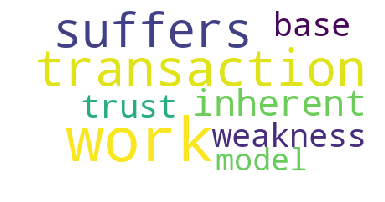

In [60]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Create and generate a word cloud image:

top_1 = corpora["bitcoin"][10]
wordcloud = WordCloud(background_color="white",
                      stopwords = set(STOPWORDS)
                      ).generate(top_1)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

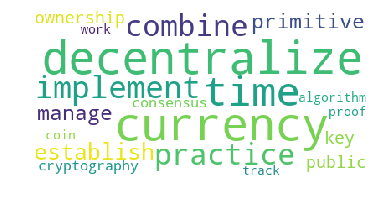

In [61]:
top_2 = corpora["ethereum"][10]
wordcloud = WordCloud(background_color="white",
                      stopwords = set(STOPWORDS)
                      ).generate(top_2)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

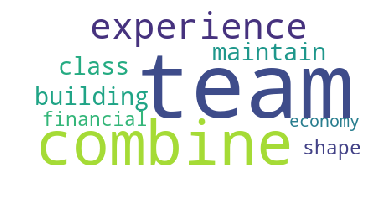

In [62]:
top_5 = corpora["binancecoin"][10]
wordcloud = WordCloud(background_color="white",
                      stopwords = set(STOPWORDS)
                      ).generate(top_5)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

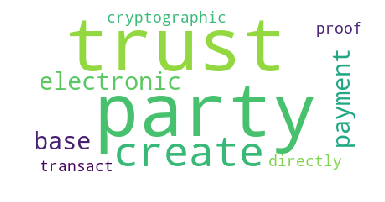

In [63]:
top_6 = corpora["tether"][10]
wordcloud = WordCloud(background_color="white",
                      stopwords = set(STOPWORDS)
                      ).generate(top_6)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

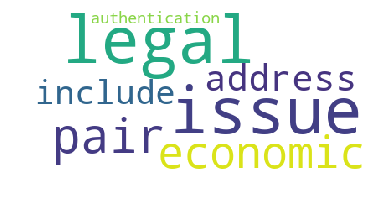

In [64]:
top_14 = corpora["ontology"][10]
wordcloud = WordCloud(background_color="white",
                      stopwords = set(STOPWORDS)
                      ).generate(top_14)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

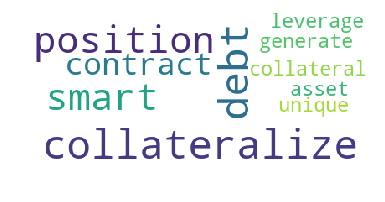

In [65]:
top_15 = corpora["maker"][10]
wordcloud = WordCloud(background_color="white",
                      stopwords = set(STOPWORDS)
                      ).generate(top_15)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

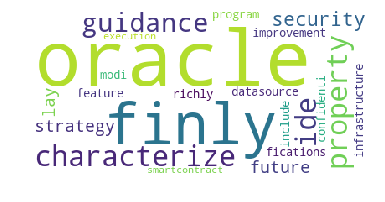

In [66]:
top_16 = corpora["chainlink"][10]
wordcloud = WordCloud(background_color="white",
                      stopwords = set(STOPWORDS)
                      ).generate(top_16)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# 3 - TFI-IDF for top white papers corpora

In [70]:
from sklearn.model_selection import train_test_split

In [68]:
df = pd.DataFrame.from_dict(corpora,orient="index").reset_index()
df.columns = ["protocol","text"]

ValueError: Length mismatch: Expected axis has 3396 elements, new values have 2 elements

In [ ]:
df.head()

In [ ]:
tf = TfidfVectorizer(analyzer="word", token_pattern=r"\w{1,}")
tf.fit(df["text"])

In [ ]:
text_tf = tf.transform([corpora["bhpcoin"]])

In [ ]:
print(text_tf)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(text_tf, corpora['bitcoin'], test_size=0.3, random_state=123)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)
print("MultinomialNB Accuracy:", metrics.accuracy_score(y_test, predicted))

In [ ]:
makeSentences = False
corpora = corpus.makeCleanCorpus(dataset, lemmatize=False, removePunct=True, removeNums=True,makeSentences=makeSentences, 
                                 removeURL=True, removeChar=True, removeEnt=False)

In [ ]:
from collections import Counter, defaultdict
import pandas as pd
import pandas as pd
temp = []
tokenizer = nltk.tokenize.RegexpTokenizer('\s+', gaps=True)
for h, c in corpora.items():
    temp.append(Counter(tokenizer.tokenize(c)))

term_count = pd.DataFrame.from_dict(temp).transpose()
term_count.columns = [s for s in list(corpora.keys())]
#term_count.reset_index(inplace=True)
term_count['sum_words'] = term_count.sum(axis = 1, skipna = True) 
term_count.fillna(0, inplace=True)
term_count.sort_values(by=['sum_words'], ascending=False).head(20)

In [ ]:
TF = term_count.iloc[:,2:9]/(term_count.iloc[:,2:9].sum(axis=0))

In [ ]:
IDF = np.log(7/((term_count.iloc[:,2:9]/term_count.iloc[:,2:9]).sum(axis=1)))

In [ ]:
TFIDF = TF.apply(lambda col: col*IDF)
TFIDF = pd.concat([term_count.iloc[:,:2],TFIDF], axis=1)
TFIDF['sum'] = TFIDF.sum(axis=1)

In [ ]:
TFIDF.sort_values('sum', ascending=False).head(20)

In [ ]:
toPlot = TFIDF.sort_values('sum', ascending=False).head(10)
statistic = toPlot.iloc[:,2:9]
#statistic.set_index(toPlot['0x'] + ' ' + toPlot['zilliqa'], inplace=True)

toPlot = statistic.T
plt.figure(figsize=(18,6))
for c in toPlot:
    plt.plot(toPlot[c], label=toPlot[c].name)
plt.legend()
plt.show()

## Method Application

# 4 - Testing 

In [105]:
TEST_DIR = os.path.join(ROOT_DIR, "test-white-papers")
testset = pdf2text.get_dataset(path=TEST_DIR)
testset.keys()

dict_keys(['adcoin', 'budbo', 'kwattcoin', 'oceanprotocol'])

In [106]:
# Define if you want your corpus to be whole or divided in sentences
makeSentences = True
# Creates a dictionary with each White Paper and its text pre-processed
corpora_test = corpus.makeCleanCorpus(testset, lemmatize=True, removePunct=True, removeNums=True, makeSentences=True, removeURL=True, removeChar= True, stops=['\u200b'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading en_core_web_md: Package 'en_core_web_md' not
[nltk_data]     found in index


Cleaning: adcoin
Cleaning: budbo
Cleaning: kwattcoin
Cleaning: oceanprotocol
Done!


# Adcoin

In [107]:
adcoin = corpora_test["adcoin"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
           for txt in adcoin]
bagsofwords[0]

Counter({'version': 1,
         'offer': 1,
         'lot': 1,
         'great': 1,
         'opportunity': 1,
         'technological': 1,
         'advancement': 1})

In [108]:
bagsofwords[1]

Counter({'adopt': 1, 'blockchain': 1, 'literally': 1, 'internet': 1})

In [109]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'advertising': 61, 'payment': 36, 'online': 26, 'version': 24, 'wallet': 22, 'market': 21, 'publisher': 20, 'team': 17, 'transaction': 15, 'lot': 14, 'cryptocurrency': 14, 'create': 14, 'blockchain': 13, 'fee': 13, 'web': 11, 'company': 11, 'integration': 9, 'currency': 9, 'image': 9, 'work': 8, 'big': 8, 'business': 8, 'pay': 8, 'marketing': 7, 'advertiser': 7, 'increase': 7, 'offer': 6, 'great': 6, 'perform': 6, 'address': 6, 'cost': 6, 'exchange': 6, 'plugin': 6, 'integrate': 6, 'content': 6, 'focus': 6, 'people': 6, 'fiat': 6, 'feature': 6, 'improve': 5, 'platform': 5, 'nerks': 5, 'start': 5, 'product': 5, 'option': 5, 'order': 5, 'gateway': 5, 'extremely': 4, 'receive': 4, 'convert': 4, 'store': 4, 'management': 4, 'release': 4, 'paid': 4, 'nerk': 4, 'facilitate': 4, 'contact': 4, 'grow': 4, 'billion': 4, 'solution': 4, 'bank': 4, 'account': 4, 'future': 4, 'price': 4, 'processing': 4, 'click': 4, 'post': 4, 'crypto': 4, 'code': 4, 'internet': 3, 'problem': 3, 'aim': 3, '

In [110]:
count = CountVectorizer()
docs = np.array(corpora_test["adcoin"])
bag = count.fit_transform(docs)
print(bag)

  (0, 14)	1
  (0, 508)	1
  (0, 345)	1
  (0, 231)	1
  (0, 295)	1
  (0, 339)	1
  (0, 541)	1
  (1, 281)	1
  (1, 294)	1
  (1, 56)	1
  (1, 12)	1
  (2, 360)	1
  (2, 369)	1
  (2, 395)	1
  (2, 125)	1
  (2, 154)	1
  (2, 281)	1
  (2, 295)	1
  (3, 509)	1
  (3, 15)	1
  (3, 19)	1
  (3, 342)	1
  (3, 259)	1
  (3, 23)	1
  (3, 360)	1
  :	:
  (156, 299)	1
  (156, 87)	1
  (156, 126)	1
  (156, 198)	1
  (156, 407)	1
  (156, 100)	1
  (156, 369)	1
  (157, 174)	1
  (157, 290)	1
  (157, 8)	1
  (157, 356)	1
  (157, 100)	1
  (157, 19)	1
  (158, 526)	1
  (158, 225)	2
  (158, 188)	1
  (158, 6)	1
  (158, 98)	1
  (158, 197)	1
  (158, 213)	1
  (158, 78)	1
  (158, 107)	2
  (158, 409)	1
  (158, 507)	1
  (158, 541)	2


# Budbo

In [111]:
budbo = corpora_test["budbo"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
           for txt in budbo]
bagsofwords[0]

Counter({'global': 1,
         'cannabis': 2,
         'comehensive': 1,
         'solution': 1,
         'indtry': 1,
         'version': 1,
         'web': 1,
         'wwwio': 1,
         'content': 1,
         'forward': 1,
         'statement': 1,
         'security': 1,
         'law': 1,
         'disclaimer': 1,
         'letter': 1,
         'key': 1,
         'definition': 1})

In [112]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'cannabis': 144, 'token': 103, 'business': 93, 'platform': 79, 'global': 73, 'industry': 65, 'inc': 64, 'user': 61, 'web': 58, 'wwwio': 58, 'blockchain': 57, 'product': 55, 'dispensary': 52, 'sale': 48, 'market': 45, 'law': 38, 'future': 38, 'include': 38, 'federal': 36, 'technology': 36, 'risk': 33, 'data': 33, 'service': 31, 'marijuana': 31, 'event': 29, 'result': 26, 'transaction': 26, 'provide': 25, 'company': 25, 'security': 24, 'time': 24, 'nerk': 24, 'state': 23, 'operation': 23, 'trading': 23, 'model': 21, 'application': 21, 'grow': 21, 'work': 21, 'price': 21, 'andor': 21, 'legal': 20, 'experience': 20, 'contract': 19, 'create': 19, 'cryptocurrency': 19, 'consumer': 19, 'regulation': 18, 'management': 18, 'base': 18, 'financial': 18, 'assurance': 18, 'party': 18, 'solution': 17, 'exchange': 17, 'track': 17, 'smart': 17, 'adversely': 17, 'control': 16, 'anticipate': 16, 'grower': 16, 'structure': 16, 'change': 16, 'launch': 16, 'statement': 15, 'app': 15, 'development'

In [113]:
count = CountVectorizer()
docs = np.array(corpora_test["budbo"])
bag = count.fit_transform(docs)
print(bag)

  (0, 413)	1
  (0, 862)	1
  (0, 890)	1
  (0, 453)	1
  (0, 874)	1
  (0, 1355)	1
  (0, 1441)	1
  (0, 650)	1
  (0, 324)	1
  (0, 1679)	1
  (0, 1658)	1
  (0, 1632)	1
  (0, 786)	1
  (0, 1403)	1
  (0, 262)	1
  (0, 202)	2
  (0, 693)	1
  (2, 990)	1
  (2, 1596)	1
  (2, 986)	1
  (2, 144)	1
  (2, 1197)	1
  (2, 495)	1
  (2, 1126)	1
  (3, 194)	1
  :	:
  (524, 404)	1
  (524, 1017)	1
  (524, 716)	1
  (524, 1214)	2
  (524, 625)	2
  (524, 1039)	1
  (524, 194)	1
  (525, 1576)	1
  (525, 149)	1
  (525, 6)	1
  (525, 787)	1
  (525, 844)	1
  (525, 194)	2
  (525, 202)	1
  (526, 770)	1
  (526, 149)	1
  (526, 1055)	1
  (526, 13)	1
  (526, 1053)	1
  (526, 442)	1
  (526, 245)	1
  (526, 1614)	1
  (526, 1679)	1
  (526, 1658)	1
  (526, 693)	1


# Kwattcoin

In [114]:
kwattcoin = corpora_test["kwattcoin"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
           for txt in kwattcoin]
bagsofwords[0]

Counter({'newwhitepaper': 1})

In [115]:
bagsofwords[1]

Counter({'disclaimer': 1,
         'document': 2,
         'constitute': 1,
         'prospectus': 1,
         'sort': 1,
         'solicitation': 1,
         'investment': 1})

In [116]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'coin': 82, 'energy': 50, 'mining': 34, 'blockchain': 15, 'plant': 15, 'electricity': 14, 'holder': 14, 'waste': 13, 'consumption': 12, 'service': 11, 'revenue': 11, 'future': 10, 'global': 10, 'kilowatt': 10, 'capacity': 10, 'transaction': 9, 'rate': 9, 'power': 9, 'sale': 9, 'statement': 8, 'operation': 8, 'enable': 8, 'price': 8, 'cost': 8, 'test': 8, 'represent': 7, 'purchase': 7, 'initial': 7, 'industry': 7, 'national': 7, 'grid': 7, 'apply': 7, 'farm': 7, 'generate': 7, 'time': 7, 'offering': 7, 'supply': 6, 'cryptocurrency': 6, 'management': 6, 'increase': 6, 'globally': 6, 'sell': 6, 'produce': 6, 'utilization': 6, 'fee': 6, 'development': 6, 'year': 6, 'total': 6, 'cash': 6, 'flow': 6, 'initiate': 6, 'forwardlooking': 5, 'result': 5, 'platform': 5, 'nerk': 5, 'cryptocurrencies': 5, 'market': 5, 'model': 5, 'footprint': 5, 'note': 5, 'process': 5, 'hour': 5, 'company': 5, 'free': 5, 'beta': 5, 'record': 5, 'document': 4, 'acquisition': 4, 'business': 4, 'additional': 4

In [117]:
count = CountVectorizer()
docs = np.array(corpora_test["kwattcoin"])
bag = count.fit_transform(docs)
print(bag)

  (0, 396)	1
  (1, 320)	1
  (1, 553)	1
  (1, 556)	1
  (1, 474)	1
  (1, 117)	1
  (1, 173)	2
  (1, 164)	1
  (2, 327)	1
  (2, 198)	1
  (2, 126)	1
  (2, 460)	1
  (2, 478)	1
  (2, 543)	1
  (2, 426)	1
  (2, 510)	1
  (2, 100)	1
  (3, 180)	1
  (3, 540)	1
  (3, 266)	1
  (3, 481)	1
  (3, 100)	2
  (4, 398)	1
  (4, 205)	1
  (4, 304)	1
  :	:
  (178, 647)	1
  (178, 220)	1
  (178, 361)	1
  (178, 587)	1
  (179, 537)	1
  (179, 45)	1
  (179, 287)	1
  (179, 357)	1
  (179, 22)	1
  (179, 391)	1
  (179, 47)	1
  (179, 294)	1
  (179, 277)	1
  (179, 494)	1
  (179, 597)	1
  (179, 107)	1
  (179, 271)	1
  (179, 647)	1
  (180, 574)	1
  (180, 561)	1
  (180, 210)	1
  (180, 0)	1
  (180, 277)	1
  (180, 184)	1
  (180, 361)	1


# Oceanprotocol

In [118]:
oceanprotocol = corpora_test["oceanprotocol"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
           for txt in oceanprotocol]
bagsofwords[0]

Counter({'decentralize': 1,
         'substrate': 1,
         'service': 1,
         'technical': 1,
         'foundation': 1,
         'ltd': 1,
         'version': 1,
         'apr': 1,
         'paper': 1})

In [119]:
bagsofwords[1]

Counter({'decentralize': 1,
         'protocol': 1,
         'nerk': 1,
         'artificial': 1,
         'intelligence': 1,
         'dataservices': 1})

In [120]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'data': 285, 'service': 192, 'nerk': 184, 'reward': 132, 'access': 129, 'token': 94, 'stake': 75, 'compute': 70, 'figure': 60, 'publisher': 60, 'asset': 59, 'feb': 55, 'actor': 51, 'market': 50, 'onchain': 49, 'include': 46, 'decentralize': 45, 'proof': 44, 'user': 44, 'store': 42, 'marketplace': 41, 'contract': 41, 'metadata': 40, 'provide': 40, 'condition': 40, 'curation': 38, 'control': 37, 'key': 35, 'design': 34, 'price': 34, 'provider': 34, 'address': 31, 'concern': 30, 'datasetservice': 30, 'party': 30, 'agreement': 29, 'add': 29, 'incentive': 29, 'supply': 29, 'dataset': 29, 'consumer': 29, 'keeper': 28, 'common': 27, 'web': 27, 'drop': 26, 'node': 26, 'time': 26, 'eg': 26, 'execute': 25, 'payment': 25, 'model': 22, 'function': 22, 'share': 21, 'case': 21, 'implement': 21, 'oep': 21, 'homepage': 21, 'software': 20, 'clan': 20, 'permissionless': 20, 'hash': 20, 'set': 19, 'architecture': 19, 'integrity': 19, 'challenge': 19, 'curve': 19, 'protocol': 18, 'privacy': 18, '

In [121]:
count = CountVectorizer()
docs = np.array(corpora_test["oceanprotocol"])
bag = count.fit_transform(docs)
print(bag)

  (0, 1198)	1
  (0, 67)	1
  (0, 1840)	1
  (0, 1004)	1
  (0, 686)	1
  (0, 1710)	1
  (0, 1566)	1
  (0, 1679)	1
  (0, 418)	1
  (1, 401)	1
  (1, 884)	1
  (1, 74)	1
  (1, 1109)	1
  (1, 1339)	1
  (1, 418)	1
  (2, 1299)	1
  (2, 1290)	1
  (2, 394)	1
  (2, 1795)	1
  (2, 136)	1
  (2, 1637)	1
  (2, 38)	1
  (3, 321)	1
  (3, 1746)	1
  (3, 1531)	1
  :	:
  (1116, 1306)	1
  (1116, 1868)	1
  (1116, 1227)	1
  (1117, 666)	1
  (1118, 368)	1
  (1118, 666)	1
  (1118, 272)	1
  (1118, 271)	1
  (1119, 473)	1
  (1119, 923)	1
  (1119, 1524)	1
  (1119, 1529)	1
  (1119, 94)	1
  (1119, 360)	1
  (1119, 1833)	1
  (1119, 1296)	2
  (1119, 1297)	1
  (1119, 394)	1
  (1120, 974)	1
  (1120, 901)	1
  (1120, 1213)	1
  (1120, 1602)	1
  (1120, 402)	1
  (1120, 1731)	1
  (1120, 5)	1


# Visualization on test papers

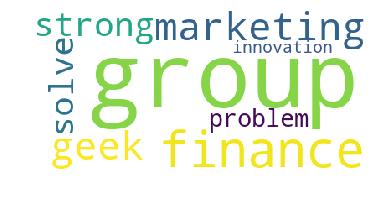

In [122]:
adcoin = corpora_test["adcoin"][10]
wordcloud = WordCloud(background_color="white",
                      stopwords = set(STOPWORDS)
                      ).generate(adcoin)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

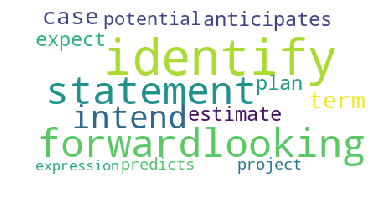

In [123]:
budbo = corpora_test["budbo"][10]
wordcloud = WordCloud(background_color="white",
                      stopwords = set(STOPWORDS)
                      ).generate(budbo)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

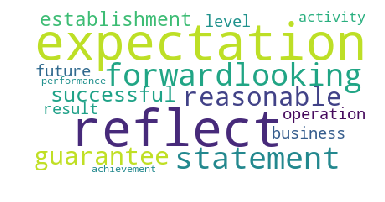

In [124]:
kwattcoin = corpora_test["kwattcoin"][10]
wordcloud = WordCloud(background_color="white",
                      stopwords = set(STOPWORDS)
                      ).generate(kwattcoin)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

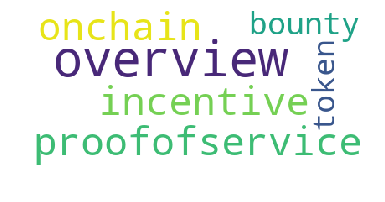

In [125]:
oceanprotocol = corpora_test["oceanprotocol"][10]
wordcloud = WordCloud(background_color="white",
                      stopwords = set(STOPWORDS)
                      ).generate(oceanprotocol)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# TF-IDF on test papers

In [126]:
makeSentences = False
corpora_test = corpus.makeCleanCorpus(testset, lemmatize=True, removePunct=True, removeNums=True, makeSentences=True, removeURL=True, removeChar= True, stops=['\u200b'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading en_core_web_md: Package 'en_core_web_md' not
[nltk_data]     found in index


Cleaning: adcoin
Cleaning: budbo
Cleaning: kwattcoin
Cleaning: oceanprotocol
Done!


In [129]:
temp = []
tokenizer = nltk.tokenize.RegexpTokenizer('\s+', gaps=True)
for h, c in corpora_test.items():
    temp.append(Counter(tokenizer.tokenize(c)))

term_count = pd.DataFrame.from_dict(temp).transpose()
term_count.columns = [s for s in list(corpora_test.keys())]
#term_count.reset_index(inplace=True)
term_count['sum_words'] = term_count.sum(axis = 1, skipna = True) 
term_count.fillna(0, inplace=True)
term_count.sort_values(by=['sum_words'], ascending=False).head(10)

NameError: name 'Counter' is not defined

In [ ]:
TF = term_count.iloc[:,2:9]/(term_count.iloc[:,2:9].sum(axis=0))
IDF = np.log(7/((term_count.iloc[:,2:9]/term_count.iloc[:,2:9]).sum(axis=1)))

In [ ]:
TFIDF = TF.apply(lambda col: col*IDF)
TFIDF = pd.concat([term_count.iloc[:,:2],TFIDF], axis=1)
TFIDF['sum'] = TFIDF.sum(axis=1)

In [ ]:
TFIDF.sort_values('sum', ascending=False).head(20)

In [ ]:
toPlot = TFIDF.sort_values('sum', ascending=False).head(10)
statistic = toPlot.iloc[:,2:9]
#statistic.set_index(toPlot['0x'] + ' ' + toPlot['zilliqa'], inplace=True)

In [ ]:
toPlot = statistic.T
plt.figure(figsize=(18,6))
for c in toPlot:
    plt.plot(toPlot[c], label=toPlot[c].name)
plt.legend()
plt.show()

# References: 

https://www.kaggle.com/rochachan/part-1-for-beginners-bag-of-words

'Bag_of_Words_tfidf_Simple_PreProcessing.ipynb' notebook by Prof. Löcher

https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a